Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00      1601

    accuracy                           1.00      1849
   macro avg       1.00      1.00      1.00      1849
weighted avg       1.00      1.00      1.00      1849



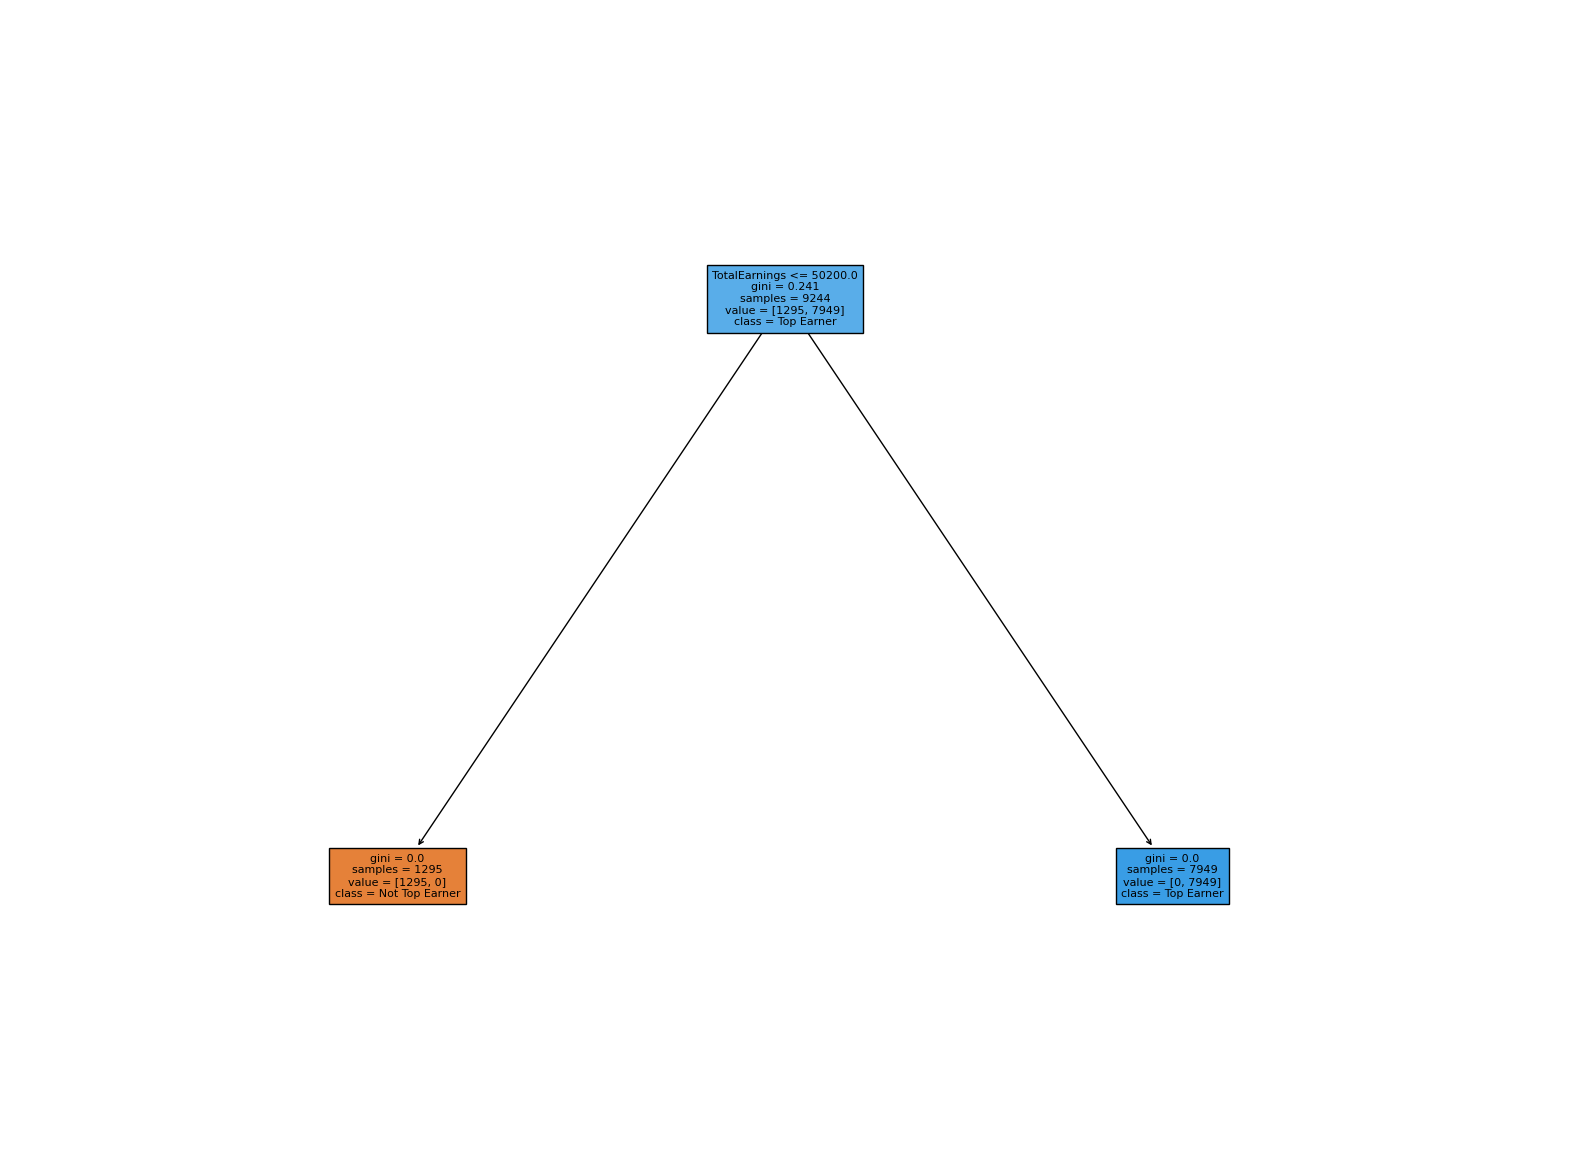

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data_creation_cleaned_no_duplicates.csv')

# Define a threshold for 'TotalEarnings' to determine top earners
earnings_threshold = 50000  # Adjust this threshold as needed

# Create a new binary target variable 'TopEarner'
data['TopEarner'] = (data['TotalEarnings'] > earnings_threshold).astype(int)

# Select relevant features for classification
features = ['Earnings', 'Players', 'Tournaments', 'TotalEarnings', 'TotalPlayers', 'TotalTournaments', 
            'Earnings_YoY_Growth', 'Players_YoY_Growth', 'Tournaments_YoY_Growth']

# Create the feature matrix X and target variable y
X = data[features]
y = data['TopEarner']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()


# Train the classifier
clf.fit(X, y)
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


# Visualize the decision tree for all games
fig = plt.figure(figsize=(20, 15))
plot_tree(clf, 
          feature_names=features,  
          class_names=['Not Top Earner', 'Top Earner'],
          filled=True,
          fontsize=8)  # Adjust fontsize as needed

plt.show()

